In [409]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

# Load data

In [410]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [411]:
path = '../Data'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.mat'):
            file_names.append(os.path.join(dirname, filename))
        
# Sắp xếp file theo số thứ tự (để đảm bảo đúng thứ tự subject)
file_names.sort(key=lambda x: int(x.split('eeg_record')[-1].split('.mat')[0]))

In [554]:
sampFreq = 128
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [413]:
# Hàm đọc dữ liệu 
def load_data(file_name):
    mat = loadmat(file_name)

    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    # Lấy tín hiệu từ các kênh 4–17
    eeg_data = data[:, 3:17]

    return data, eeg_data

In [414]:
def load_eeg_data(file_names):
    all_data = []
    for file_name in file_names:
        # Lấy Trial ID từ tên file
        trial_id = int(file_name.split('eeg_record')[-1].split('.mat')[0])

        try:
            print(f"Đang xử lý file: {file_name}, Trial ID: {trial_id}")
            _, eeg_data = load_data(file_name)

            # Kiểm tra kích thước dữ liệu trả về
            if eeg_data is not None and eeg_data.size > 0:
                all_data.append((eeg_data))
            else:
                print(f"Dữ liệu EEG từ file {file_name} không hợp lệ hoặc rỗng.")
        except Exception as e:
            print(f"Lỗi khi xử lý file {file_name}: {e}")
    
    return all_data

In [415]:
def get_data_5days(full_data):
    num_initial_days=2

    filtered_data_5days = []

    for i in range(5):  # 5 người
        # Số lượng file của mỗi người, người thứ 5 có 6 file, còn lại là 7 file
        num_files = 7 if i != 4 else 6

        # Lấy dữ liệu từ các ngày đo thực sự (bỏ qua 2 ngày đầu)
        real_measurement_files = full_data[i * 7 + num_initial_days: i * 7 + num_files]

        # Thêm dữ liệu vào danh sách kết quả
        filtered_data_5days.extend(real_measurement_files)

    return filtered_data_5days

In [536]:
full_data = load_eeg_data(file_names)
reduce_data = get_data_5days(full_data)

Đang xử lý file: ../Data\eeg_record1.mat, Trial ID: 1
Đang xử lý file: ../Data\eeg_record2.mat, Trial ID: 2
Đang xử lý file: ../Data\eeg_record3.mat, Trial ID: 3
Đang xử lý file: ../Data\eeg_record4.mat, Trial ID: 4
Đang xử lý file: ../Data\eeg_record5.mat, Trial ID: 5
Đang xử lý file: ../Data\eeg_record6.mat, Trial ID: 6
Đang xử lý file: ../Data\eeg_record7.mat, Trial ID: 7
Đang xử lý file: ../Data\eeg_record8.mat, Trial ID: 8
Đang xử lý file: ../Data\eeg_record9.mat, Trial ID: 9
Đang xử lý file: ../Data\eeg_record10.mat, Trial ID: 10
Đang xử lý file: ../Data\eeg_record11.mat, Trial ID: 11
Đang xử lý file: ../Data\eeg_record12.mat, Trial ID: 12
Đang xử lý file: ../Data\eeg_record13.mat, Trial ID: 13
Đang xử lý file: ../Data\eeg_record14.mat, Trial ID: 14
Đang xử lý file: ../Data\eeg_record15.mat, Trial ID: 15
Đang xử lý file: ../Data\eeg_record16.mat, Trial ID: 16
Đang xử lý file: ../Data\eeg_record17.mat, Trial ID: 17
Đang xử lý file: ../Data\eeg_record18.mat, Trial ID: 18
Đang xử lý

In [543]:
reduce_data

[array([[4440.51282051, 3804.1025641 , 5210.76923077, ..., 4282.56410256,
         4333.84615385, 4024.1025641 ],
        [4440.51282051, 3796.41025641, 5205.64102564, ..., 4282.56410256,
         4335.38461538, 4017.94871795],
        [4440.51282051, 3798.97435897, 5207.17948718, ..., 4282.56410256,
         4334.87179487, 4018.97435897],
        ...,
        [4447.17948718, 4012.82051282, 5086.15384615, ..., 4283.58974359,
         4336.41025641, 4202.05128205],
        [4447.17948718, 4004.61538462, 5076.41025641, ..., 4283.58974359,
         4335.8974359 , 4200.        ],
        [4447.17948718, 4002.56410256, 5072.30769231, ..., 4283.58974359,
         4334.35897436, 4200.        ]]),
 array([[4436.92307692, 4072.82051282, 5005.12820513, ..., 4283.07692308,
         4333.84615385, 4185.64102564],
        [4437.94871795, 4076.41025641, 5012.30769231, ..., 4283.07692308,
         4332.82051282, 4191.28205128],
        [4438.97435897, 4075.8974359 , 5018.46153846, ..., 4283.07692308,

# Filter data

In [537]:
from scipy.signal import butter, filtfilt, iirnotch

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

In [538]:
def filter_data(data_set):
    # Lọc thông cao và thông thấp và lọc notch cho từng file
    filtered_all_data = []
    for data_eeg in data_set:
        # Lọc thông cao và thông thấp cho dữ liệu của file hiện tại
        lowcut = 0.5  # Hz
        highcut = 30  # Hz
        filtered_data_bandpass = bandpass_filter(data_eeg, lowcut, highcut, sampFreq)

        # Lọc notch để loại bỏ nhiễu 50 Hz cho dữ liệu đã lọc thông
        notch_freq = 50  # Hz
        filtered_data_notch = notch_filter(filtered_data_bandpass, notch_freq, sampFreq)

        # Lưu dữ liệu đã lọc vào danh sách
        filtered_all_data.append(filtered_data_notch)
    
    return filtered_all_data

In [539]:
filtered_reduce_data = filter_data(reduce_data)

* Visualize data

In [541]:
def analyze_data(filtered_all_data, file_names, subject_map=None, num_files=2):
    # Phân tích dữ liệu
    if subject_map is not None:
        # Chỉ phân tích những file có trong subject_map
        valid_indices = sum(subject_map.values(), [])
        valid_indices = [x - 1 for x in valid_indices]
    else:
        # Phân tích tất cả các file
        valid_indices = list(range(len(file_names)))

    for i in valid_indices[:num_files]:  # Duyệt qua một số file để trực quan hóa
        data, eeg_data = load_data(file_names[i])

        # Vẽ dữ liệu đầy đủ từ file
        print('Dữ liệu đầy đủ từ file {}:'.format(file_names[i]), data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(data)
        plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Vẽ dữ liệu từ các kênh 4-17
        print('\nDữ liệu EEG từ các kênh 4-17:', eeg_data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(eeg_data[:1000, :])  # Giả sử vẽ 1000 mẫu đầu tiên
        plt.title('Data EEG (Channel 4-17) from 1000 data')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Biểu diễn tín hiệu sau khi lọc của 1000 data đầu tiên
        filtered_data = filtered_all_data[i]  # Lấy dữ liệu đã lọc của file thứ i
        plt.figure(figsize=(10, 4))
        plt.plot(filtered_data[:1000, :])  # Lấy 1000 mẫu đầu tiên từ dữ liệu đã lọc
        plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch) from 1000 data')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.show()

In [544]:
# Số tổng subject (5)
total_subjects = 5

# Tạo ánh xạ subject_map, với việc lùi chỉ số
subject_map = {}
for s in range(1, total_subjects + 1):
    # Lùi chỉ số 2 ngày đầu, vì cần bỏ qua 2 ngày thử nghiệm
    a = int(7 * (s - 1)) + 3  # Bắt đầu từ ngày thứ 3
    if s != 5:
        b = a + 5  # Người 1-4 có 5 ngày thực tế
    else:
        b = a + 4  # Người 5 có 4 ngày thực tế
    subject_map[s] = [i for i in range(a, b)]

# In ra subject_map để kiểm tra
print(subject_map)

{1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


Dữ liệu đầy đủ từ file ../Data\eeg_record3.mat: (357224, 25)


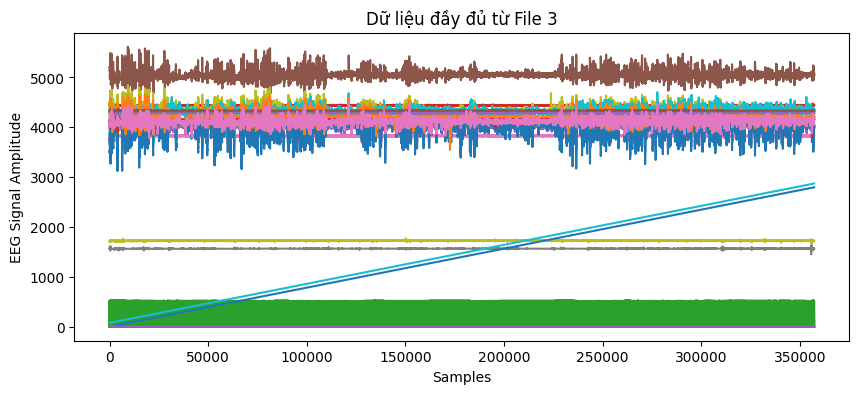


Dữ liệu EEG từ các kênh 4-17: (357224, 14)


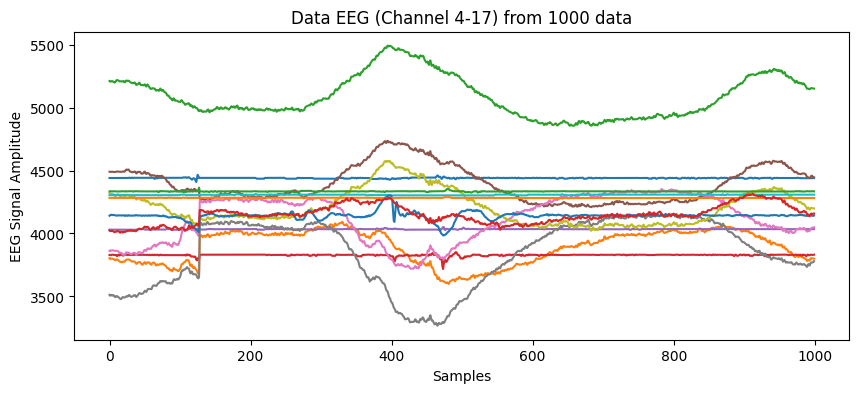

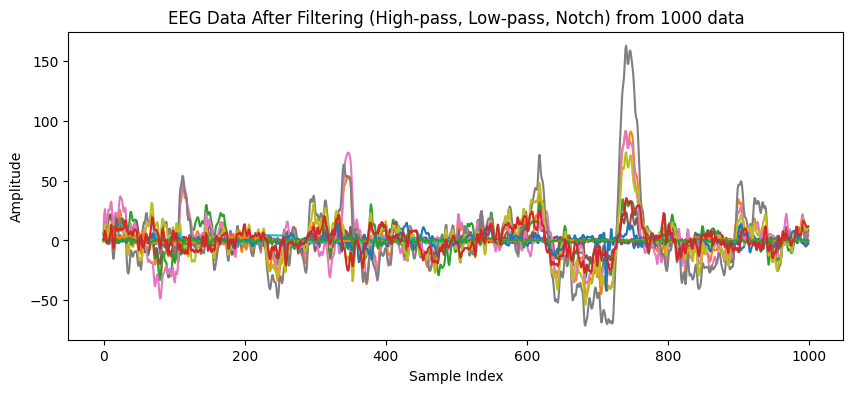

Dữ liệu đầy đủ từ file ../Data\eeg_record4.mat: (380344, 25)


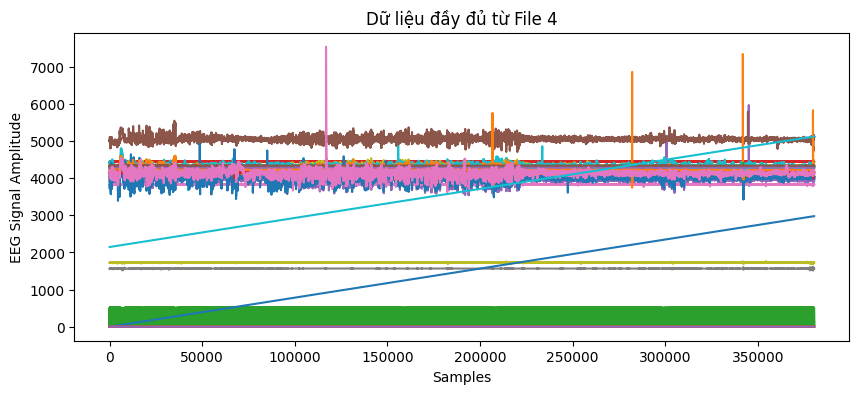


Dữ liệu EEG từ các kênh 4-17: (380344, 14)


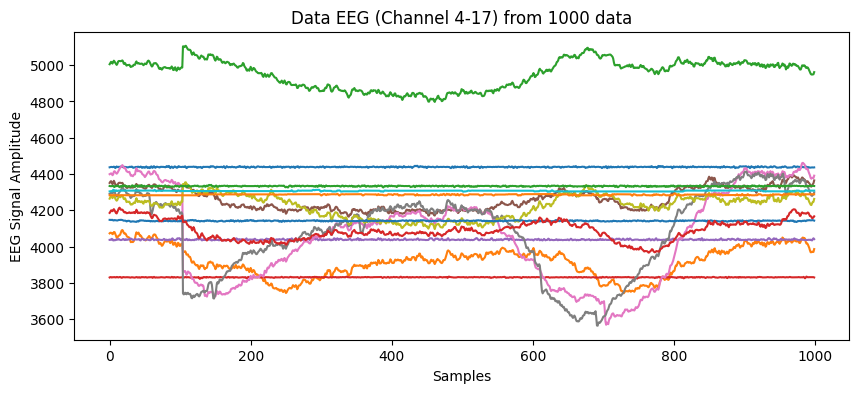

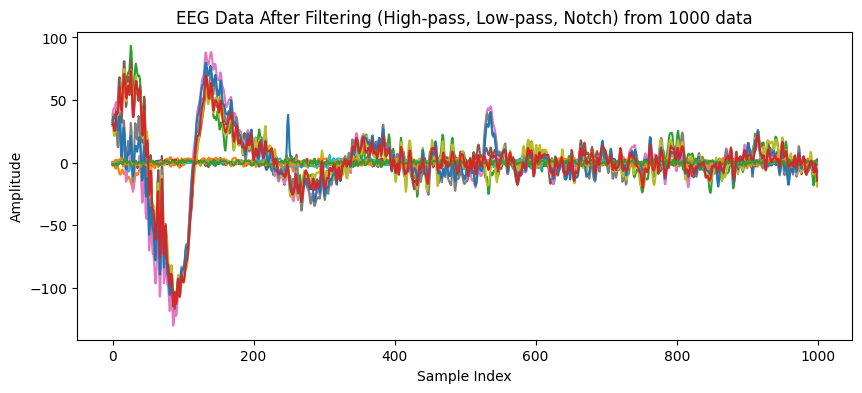

In [423]:
analyze_data(filtered_reduce_data, file_names, subject_map=subject_map)

In [545]:
def plot_frequency_bands(filtered_data):
    # Định nghĩa các dải tần số
    alpha_low, alpha_high = 8, 13  # Hz
    beta_low, beta_high = 13, 30  # Hz
    delta_low, delta_high = 0.5, 4  # Hz
    theta_low, theta_high = 4, 8  # Hz

    # Lọc thông dải để giữ lại các dải tần số khác nhau
    alpha_band = bandpass_filter(filtered_data, alpha_low, alpha_high, sampFreq)
    beta_band = bandpass_filter(filtered_data, beta_low, beta_high, sampFreq)
    delta_band = bandpass_filter(filtered_data, delta_low, delta_high, sampFreq)
    theta_band = bandpass_filter(filtered_data, theta_low, theta_high, sampFreq)

    # Biểu diễn tín hiệu dải delta
    plt.figure(figsize=(15, 6))
    plt.plot(delta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Delta Band (0.5-4 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải theta
    plt.figure(figsize=(15, 6))
    plt.plot(theta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Theta Band (4-8 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải alpha
    plt.figure(figsize=(15, 6))
    plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Alpha Band (8-13 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải beta
    plt.figure(figsize=(15, 6))
    plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Beta Band (13-30 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()


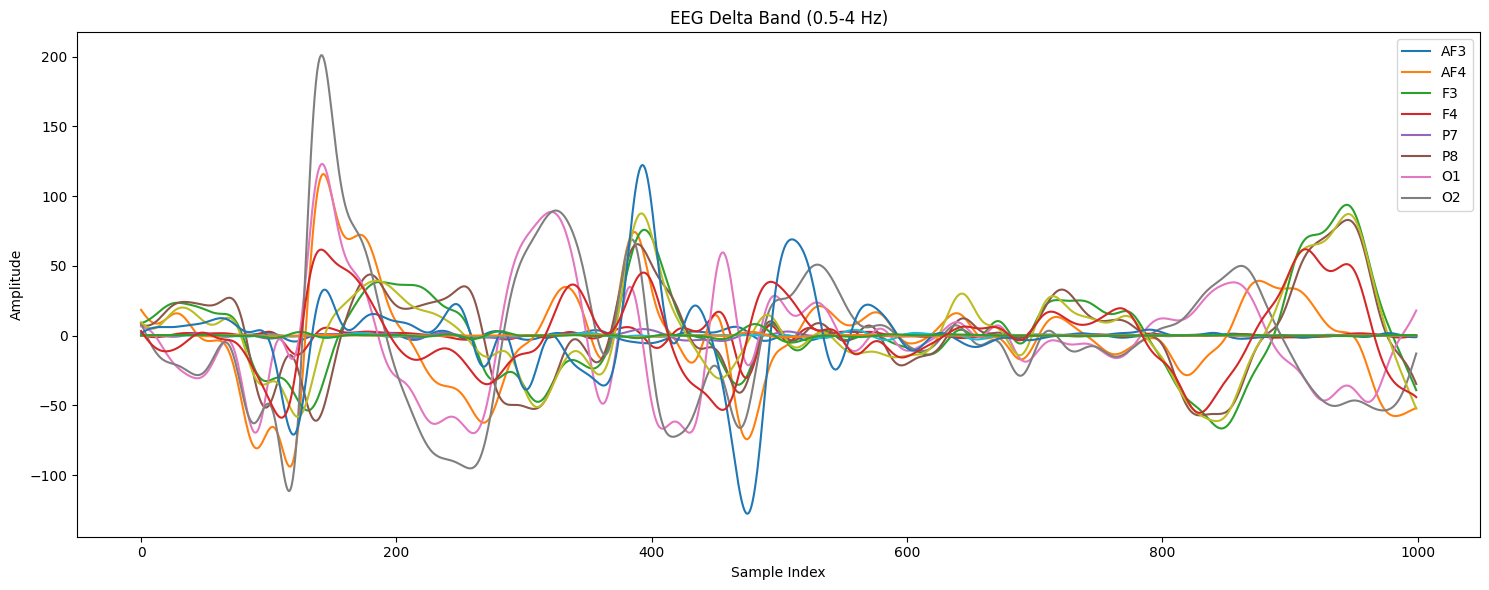

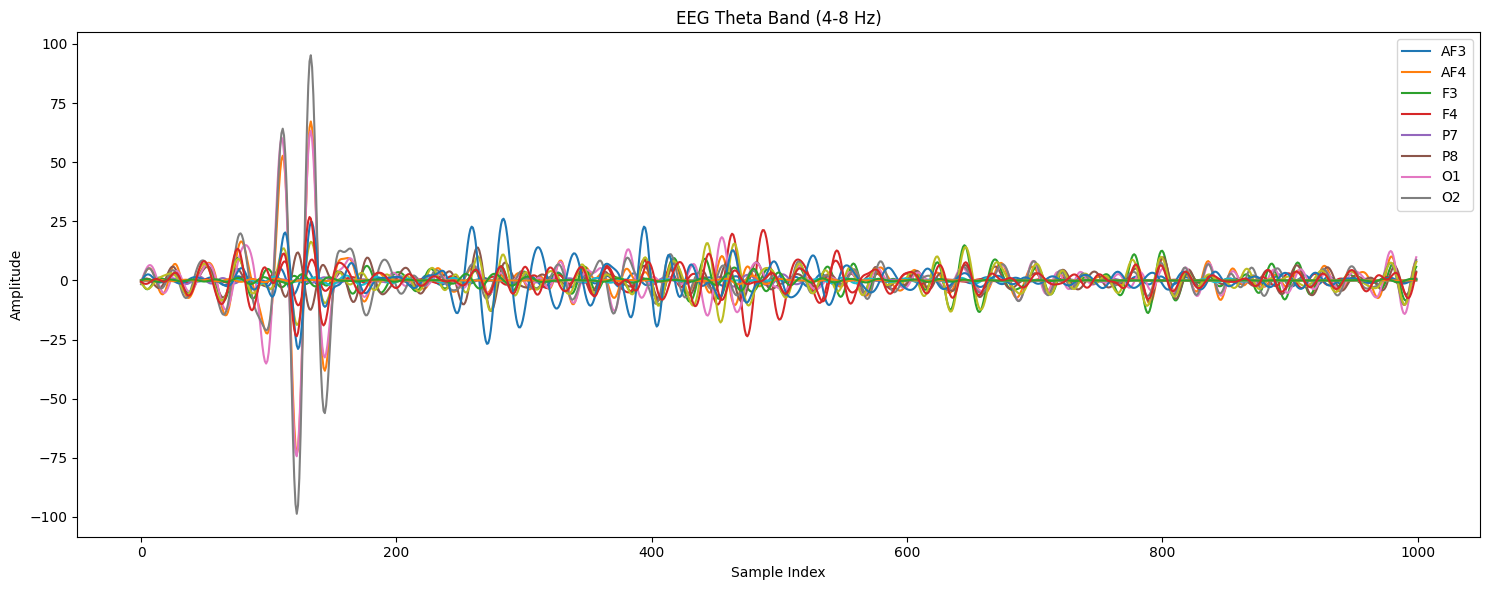

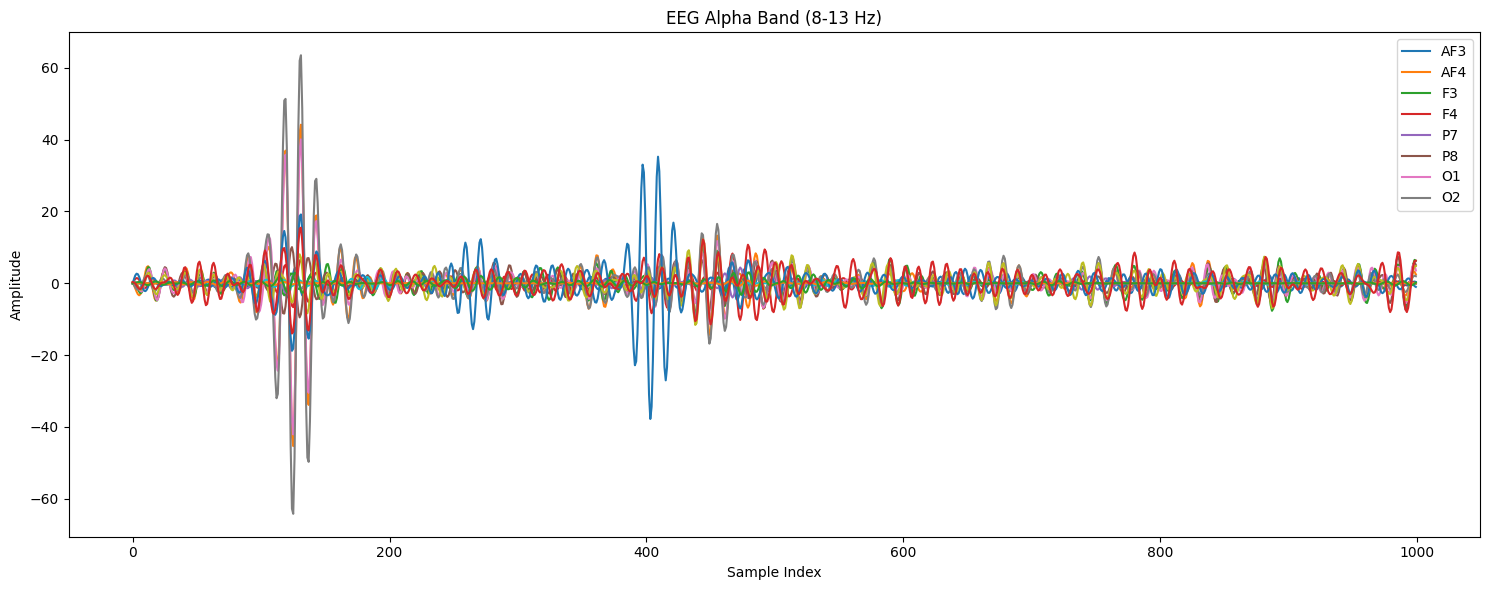

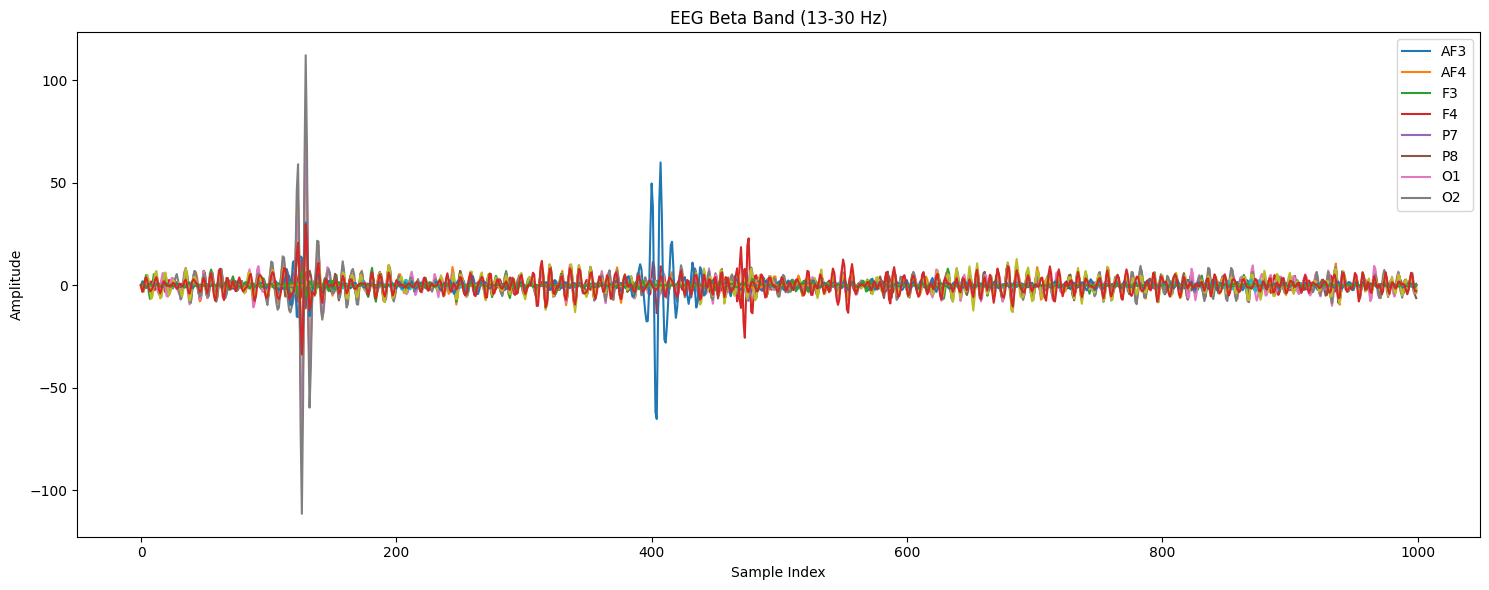

In [546]:
plot_frequency_bands(filtered_reduce_data[0])

# ICA

In [552]:
import mne
from mne.preprocessing import ICA

def apply_ica_to_data(filtered_data):
    ica_list = []
    raw_list = []

    for i in range(len(filtered_data)):

        data_one_day = filtered_data[i]

        # Tạo thông tin cho đối tượng Raw
        sfreq = 128  # Tần số lấy mẫu 
        info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')

        # Lấy dữ liệu đã lọc từ danh sách, chuyển đổi thành dạng phù hợp cho MNE
        filtered_data_mne = data_one_day.T  # Chuyển thành (n_channels, n_times)

        # Tạo đối tượng Raw từ dữ liệu
        raw = mne.io.RawArray(filtered_data_mne, info)

        # Thêm montage vào đối tượng Raw với montage 'standard_1020'
        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage)

        # Áp dụng ICA để tách các thành phần độc lập
        ica = ICA(n_components=14, random_state=42, max_iter='auto')
        ica.fit(raw)

        # Lưu ICA và Raw để sử dụng sau
        ica_list.append(ica)
        raw_list.append(raw)

        # In ra thông báo đã xử lý xong
        print(f'Đã áp dụng ICA cho dữ liệu của ngày thứ {i+1}')

    return ica_list, raw_list

In [555]:
# Áp dụng hàm cho filtered_full_data và filtered_reduce_data
ica_reduce_data, raw_reduce_data = apply_ica_to_data(filtered_reduce_data)

Creating RawArray with float64 data, n_channels=14, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 2.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 1
Creating RawArray with float64 data, n_channels=14, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 2
Creating RawArray with float64 data, n_channels=14, n_times=351204
    Range : 0 ... 351203 =      0.000 ...  2743.773 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.6s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 3
Creating RawArray with float64 data, n_channels=14, n_times=288752
    Range : 0 ... 288751 =      0.000 ...  2255.867 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 3.4s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 4
Creating RawArray with float64 data, n_channels=14, n_times=398816
    Range : 0 ... 398815 =      0.000 ...  3115.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 3.4s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 5
Creating RawArray with float64 data, n_channels=14, n_times=381340
    Range : 0 ... 381339 =      0.000 ...  2979.211 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 6
Creating RawArray with float64 data, n_channels=14, n_times=391624
    Range : 0 ... 391623 =      0.000 ...  3059.555 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 3.7s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 7
Creating RawArray with float64 data, n_channels=14, n_times=356728
    Range : 0 ... 356727 =      0.000 ...  2786.930 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.8s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 8
Creating RawArray with float64 data, n_channels=14, n_times=373304
    Range : 0 ... 373303 =      0.000 ...  2916.430 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 5.1s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 9
Creating RawArray with float64 data, n_channels=14, n_times=345164
    Range : 0 ... 345163 =      0.000 ...  2696.586 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 2.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 10
Creating RawArray with float64 data, n_channels=14, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  3468.523 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.4s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 11
Creating RawArray with float64 data, n_channels=14, n_times=361840
    Range : 0 ... 361839 =      0.000 ...  2826.867 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.7s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 12
Creating RawArray with float64 data, n_channels=14, n_times=333236
    Range : 0 ... 333235 =      0.000 ...  2603.398 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 2.5s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 13
Creating RawArray with float64 data, n_channels=14, n_times=396812
    Range : 0 ... 396811 =      0.000 ...  3100.086 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 8.8s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 14
Creating RawArray with float64 data, n_channels=14, n_times=336280
    Range : 0 ... 336279 =      0.000 ...  2627.180 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 6.5s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 15
Creating RawArray with float64 data, n_channels=14, n_times=360928
    Range : 0 ... 360927 =      0.000 ...  2819.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.5s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 16
Creating RawArray with float64 data, n_channels=14, n_times=415164
    Range : 0 ... 415163 =      0.000 ...  3243.461 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 10.2s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 17
Creating RawArray with float64 data, n_channels=14, n_times=363232
    Range : 0 ... 363231 =      0.000 ...  2837.742 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 18
Creating RawArray with float64 data, n_channels=14, n_times=347548
    Range : 0 ... 347547 =      0.000 ...  2715.211 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.8s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 19
Creating RawArray with float64 data, n_channels=14, n_times=214540
    Range : 0 ... 214539 =      0.000 ...  1676.086 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.3s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 20
Creating RawArray with float64 data, n_channels=14, n_times=428848
    Range : 0 ... 428847 =      0.000 ...  3350.367 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 3.0s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 21
Creating RawArray with float64 data, n_channels=14, n_times=483732
    Range : 0 ... 483731 =      0.000 ...  3779.148 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 4.9s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 22
Creating RawArray with float64 data, n_channels=14, n_times=483376
    Range : 0 ... 483375 =      0.000 ...  3776.367 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 5.2s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 23
Creating RawArray with float64 data, n_channels=14, n_times=408976
    Range : 0 ... 408975 =      0.000 ...  3195.117 secs
Ready.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\Phuong\AppData\Local\Temp\ipykernel_21288\188655199.py:28: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 3.5s.
Đã áp dụng ICA cho dữ liệu của ngày thứ 24


In [556]:
def plot_ica_components(ica_list, raw_list, num_files=2, reduce=False):
    # Nếu giảm dữ liệu, tính toán chỉ số file bắt đầu từ file thứ 3
    if reduce:
        start_index = 2  # Người thứ 1 bắt đầu từ file thứ 3
        step = 7  # Bước nhảy mỗi lần là 7 (người 2 từ file thứ 10, người 3 từ file thứ 17, v.v.)
    else:
        start_index = 0  # Nếu không giảm, bắt đầu từ file thứ 1
        step = 1  # Bước nhảy 1 file mỗi lần

    for i in range(num_files):
        # Tính chỉ số file dựa trên người và kiểu dữ liệu
        file_index = start_index + i * step
        if file_index < len(ica_list):
            print(f'Vẽ các thành phần ICA cho file thứ {file_index + 1}')

            # Vẽ các thành phần ICA
            ica_list[file_index].plot_components()

            # Vẽ tín hiệu của các thành phần ICA với Raw data
            ica_list[file_index].plot_sources(raw_list[file_index], start=0, stop=40, show_scrollbars=False)

            plt.show()

Vẽ các thành phần ICA cho file thứ 1


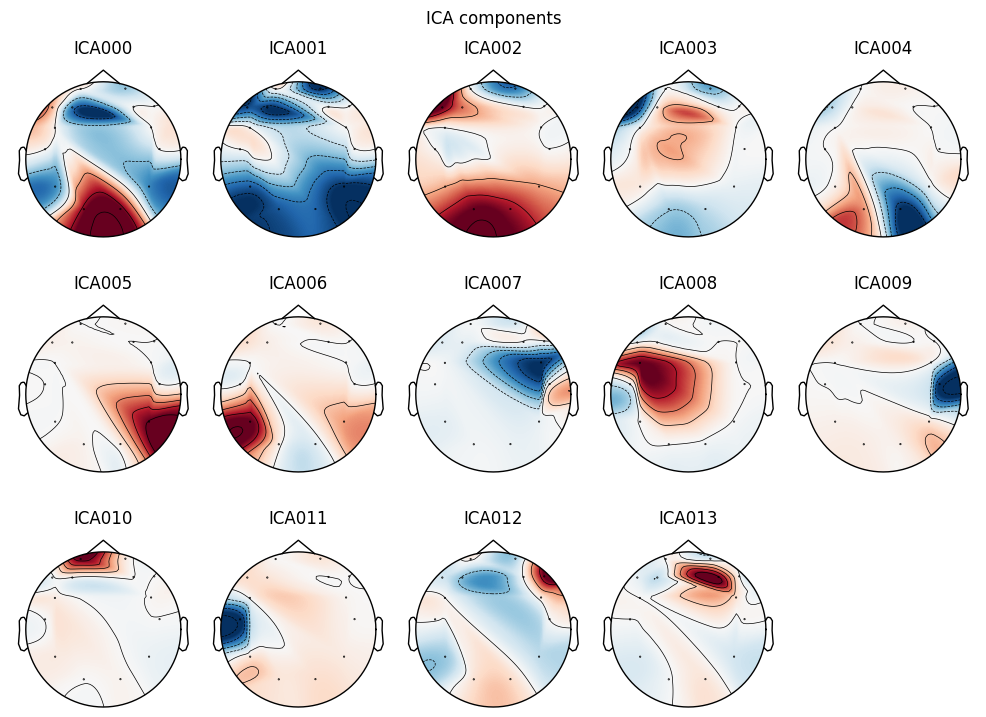

Creating RawArray with float64 data, n_channels=14, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.


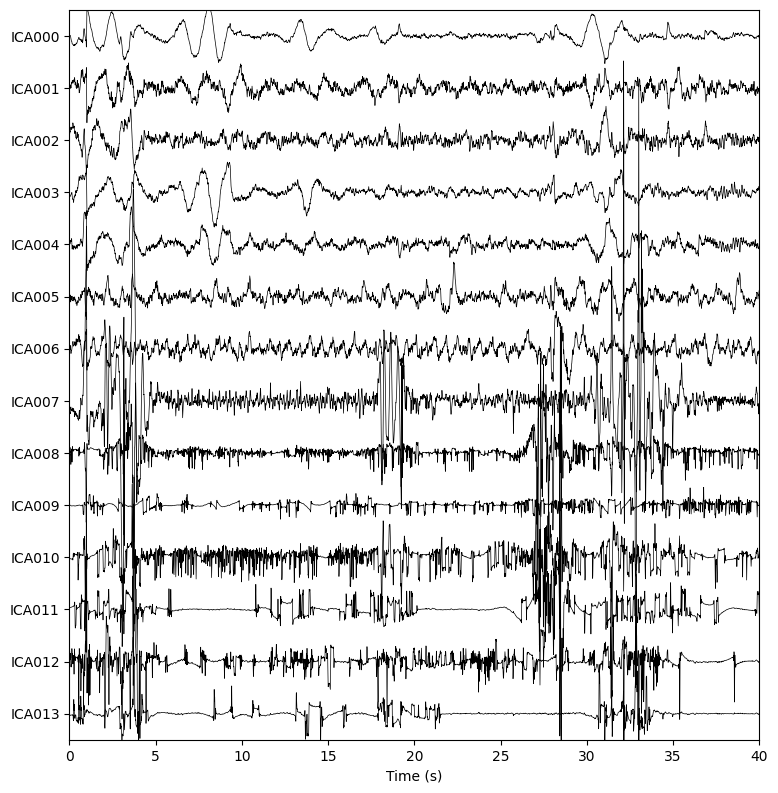

Vẽ các thành phần ICA cho file thứ 2


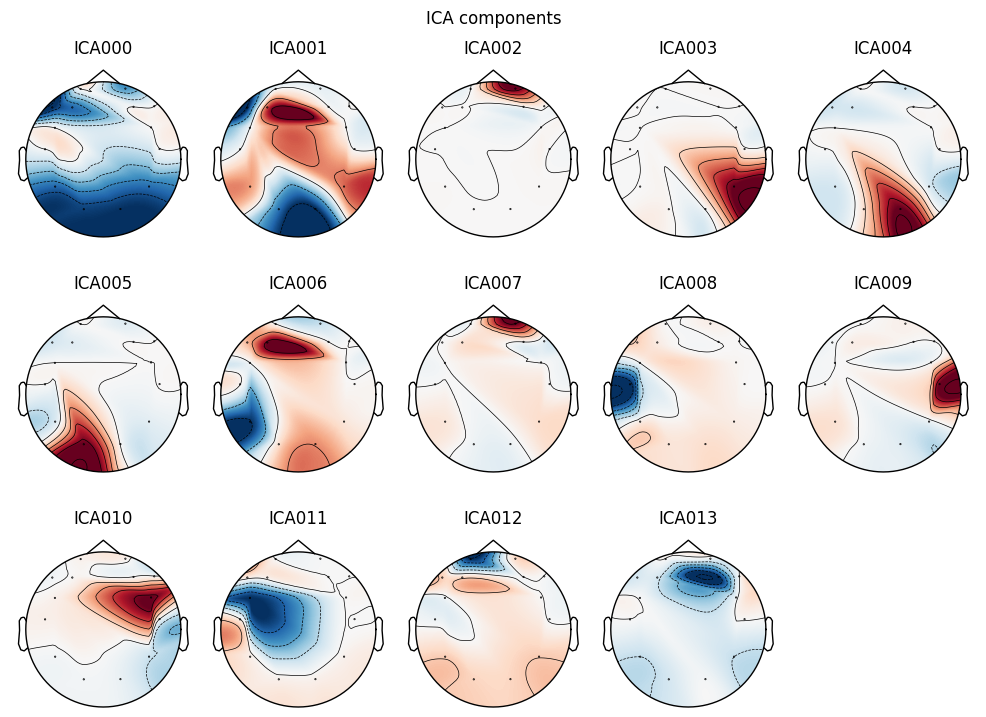

Creating RawArray with float64 data, n_channels=14, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.


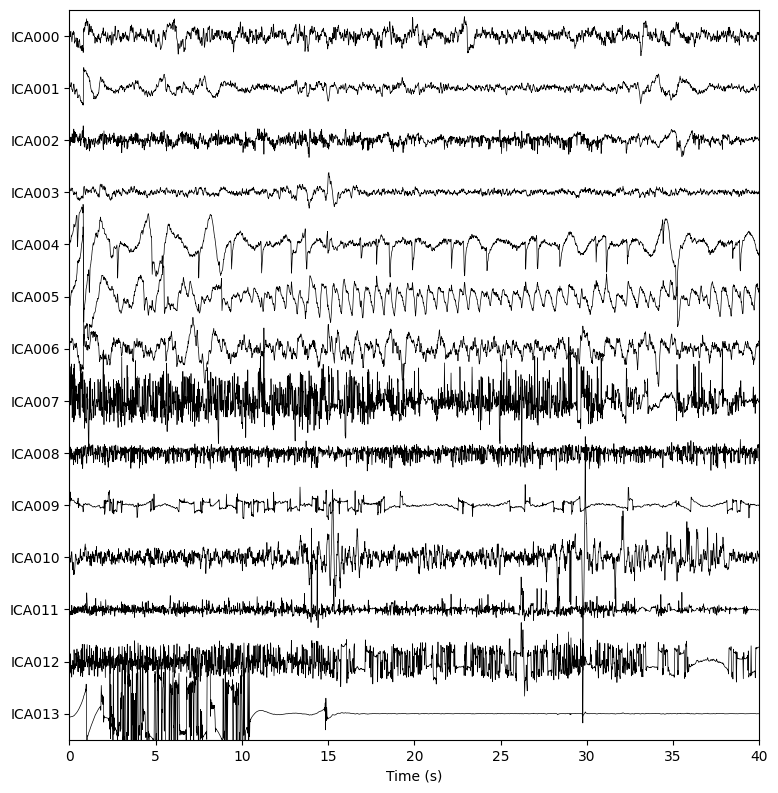

In [557]:
plot_ica_components(ica_reduce_data, raw_reduce_data)

In [558]:
def detect_eog_artifacts(ica, raw, eye_channels):
    """
    Phát hiện các thành phần ICA liên quan đến nhiễu EOG (nháy mắt) từ các kênh mắt.
    """
    all_eog_indices = {}

    for ch in eye_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nháy mắt (EOG)
                eog_indices, scores = ica.find_bads_eog(raw, ch_name=ch)
                all_eog_indices[ch] = eog_indices
                print(f"Kênh {ch}: Thành phần ICA liên quan đến EOG: {eog_indices}")
            except ValueError as e:
                print(f"Lỗi khi xử lý kênh {ch}: {e}")
            except Exception as e:
                print(f"Lỗi không xác định với kênh {ch}: {e}")
        else:
            print(f"Kênh {ch} không tồn tại trong dữ liệu.")

    return all_eog_indices


def detect_ecg_artifacts(ica, raw, heart_related_channels):
    """
    Phát hiện các thành phần ICA liên quan đến nhiễu ECG (nhịp tim) từ các kênh liên quan đến tim.
    """
    all_ecg_indices = {}

    for ch in heart_related_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nhịp tim (ECG)
                ecg_indices, scores = ica.find_bads_ecg(raw, ch_name=ch)
                all_ecg_indices[ch] = ecg_indices
                print(f"Kênh {ch}: Thành phần ICA liên quan đến ECG: {ecg_indices}")
            except ValueError as e:
                print(f"Lỗi khi xử lý kênh {ch}: {e}")
            except Exception as e:
                print(f"Lỗi không xác định với kênh {ch}: {e}")
        else:
            print(f"Kênh {ch} không tồn tại trong dữ liệu.")

    return all_ecg_indices


In [560]:
print(raw.ch_names)  # In danh sách tên kênh


['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


In [562]:
def detect_artifacts(ica_list, raw_list):
    # Danh sách các kênh bị ảnh hưởng nhiễu từ mắt và tim
    eye_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    heart_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

    eog_indices = []
    ecg_indices = []

    # Duyệt qua từng file trong raw_list và ica_list
    for i in range(len(raw_list)):
        print(f"\nKết quả cho file #{i + 1}:")
        
        # Phát hiện nhiễu EOG và ECG cho từng file
        eog = detect_eog_artifacts(ica_list[i], raw_list[i], eye_channels)
        ecg = detect_ecg_artifacts(ica_list[i], raw_list[i], heart_channels)

        eog_indices.append(eog)
        ecg_indices.append(ecg)


    return eog_indices, ecg_indices

In [563]:
eog_indices, ecg_indices = detect_artifacts(ica_reduce_data, raw_reduce_data)


Kết quả cho file #1:
Using EOG channel: AF3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff f

In [564]:
def get_artifacts_table(eog_indices, ecg_indices, data_type="EOG"):
    # Khởi tạo danh sách các kênh
    channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

    # Dữ liệu sẽ chứa thông tin từng chỉ số ICA bị nhiễu cho các kênh
    artifact_data = {channel: [] for channel in channels}

    # Duyệt qua từng file để lấy các chỉ số ICA nhiễu
    for artifact in (eog_indices if data_type == "EOG" else ecg_indices):
        for channel in channels:
            # Lấy các thành phần ICA bị nhiễu cho kênh này
            artifact_data[channel].append(artifact.get(channel, []))

    # Chuyển thành DataFrame
    artifact_df = pd.DataFrame(artifact_data)

    # Trả về bảng kết quả
    return artifact_df.transpose()  # Trả về DataFrame với mỗi file là một cột

# In kết quả EOG - Dữ liệu giảm
eog_df = get_artifacts_table(eog_indices, ecg_indices, data_type="EOG")
print("\nCác chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu giảm:")
print(eog_df)

# In kết quả ECG - Dữ liệu giảm
ecg_df = get_artifacts_table(eog_indices, ecg_indices, data_type="ECG")
print("\nCác chỉ số ICA bị nhiễu tim (ECG) - Dữ liệu giảm:")
print(ecg_df)


Các chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu giảm:
          0         1        2        3        4        5        6       7   \
AF3  [10, 7]  [12, 10]  [10, 7]       []  [8, 11]      [9]   [7, 8]     [9]   
F7        []        []      [1]      [6]       []       []       []  [1, 5]   
F3       [1]       [0]      [5]       []       []       []      [0]     [1]   
FC5      [8]      [11]     [11]   [8, 6]       []      [8]   [8, 7]      []   
T7   [11, 7]       [8]   [9, 7]  [12, 6]  [10, 8]     [11]  [11, 0]      []   
P7        []       [0]       []   [0, 5]       []   [0, 5]       []      []   
O1        []        []       []   [0, 3]       []   [0, 1]       []     [0]   
O2        []        []       []       []       []       []       []  [2, 1]   
P8        []    [3, 0]      [0]   [0, 7]   [1, 2]       []       []     [1]   
T8       [9]    [9, 3]   [8, 0]      [9]      [7]     [10]  [10, 0]    [13]   
FC6      [7]      [10]      [7]      [0]      [9]      [7]      [9]     [8]   
F

In [437]:
def exclude_ica_components_for_all(ica_list, raw_list, eog_indices_list, ecg_indices_list):

    excluded_raw_list = []
    excluded_ica_list = []

    for idx, ica in enumerate(ica_list):
        print(f"\nĐang loại bỏ thành phần ICA cho file #{idx + 1}:")
        
        # Lấy chỉ số EOG và ECG cho từng file
        eog_indices = eog_indices_list[idx]
        ecg_indices = ecg_indices_list[idx]
        
        # Tạo bản sao của raw để giữ dữ liệu gốc và dữ liệu đã loại trừ riêng biệt
        raw_copy = raw_list[idx].copy()

        # Loại bỏ các thành phần ICA cho EOG và ECG
        all_exclude_indices = []
        
        # Thêm các thành phần ICA bị nhiễu EOG và ECG vào danh sách loại trừ
        for eog in eog_indices.values():  # Duyệt qua các chỉ số EOG
            all_exclude_indices.extend(eog)
        
        for ecg in ecg_indices.values():  # Duyệt qua các chỉ số ECG
            all_exclude_indices.extend(ecg)
        
        # Loại bỏ các thành phần ICA trong ica.exclude
        ica.exclude = list(set(all_exclude_indices))  # Loại bỏ trùng lặp
        print(f"Đã loại bỏ các thành phần ICA: {ica.exclude}")
        
        # Áp dụng ICA sau khi loại trừ
        ica.apply(raw_copy)  # Áp dụng loại trừ vào bản sao của raw

        # Thêm dữ liệu đã loại trừ vào danh sách kết quả
        excluded_raw_list.append(raw_copy)
        excluded_ica_list.append(ica)  # Lưu lại đối tượng ICA đã loại trừ

        print(f"Đã loại trừ thành công cho file #{idx + 1}")
    
    return excluded_ica_list ,excluded_raw_list

# Sử dụng với dữ liệu đầy đủ (full_data) và dữ liệu giảm (reduce_data)
excluded_ica_full, excluded_raw_full = exclude_ica_components_for_all(ica_full_data, raw_full_data, eog_indices_full, ecg_indices_full)

# excluded_raw_reduce_data = exclude_ica_components_for_all(ica_reduce_data, raw_reduce_data, eog_indices_reduce, ecg_indices_reduce)
excluded_ica_reduce = get_data_5days(excluded_ica_full)
excluded_raw_reduce = get_data_5days(excluded_raw_full)


Đang loại bỏ thành phần ICA cho file #1:
Đã loại bỏ các thành phần ICA: [1, 3]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #1

Đang loại bỏ thành phần ICA cho file #2:
Đã loại bỏ các thành phần ICA: [10, 12, 13]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #2

Đang loại bỏ thành phần ICA cho file #3:
Đã loại bỏ các thành phần ICA: [1, 7, 10, 12, 13]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 5 ICA components
    Projecting back using 14 PCA components
Đã loại trừ thành công cho file #3

Đang loại bỏ thành phần ICA cho file #4:
Đã loại bỏ các thành phần ICA: [0, 2, 10, 12, 13]
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing ou

Vẽ các thành phần ICA cho file thứ 1


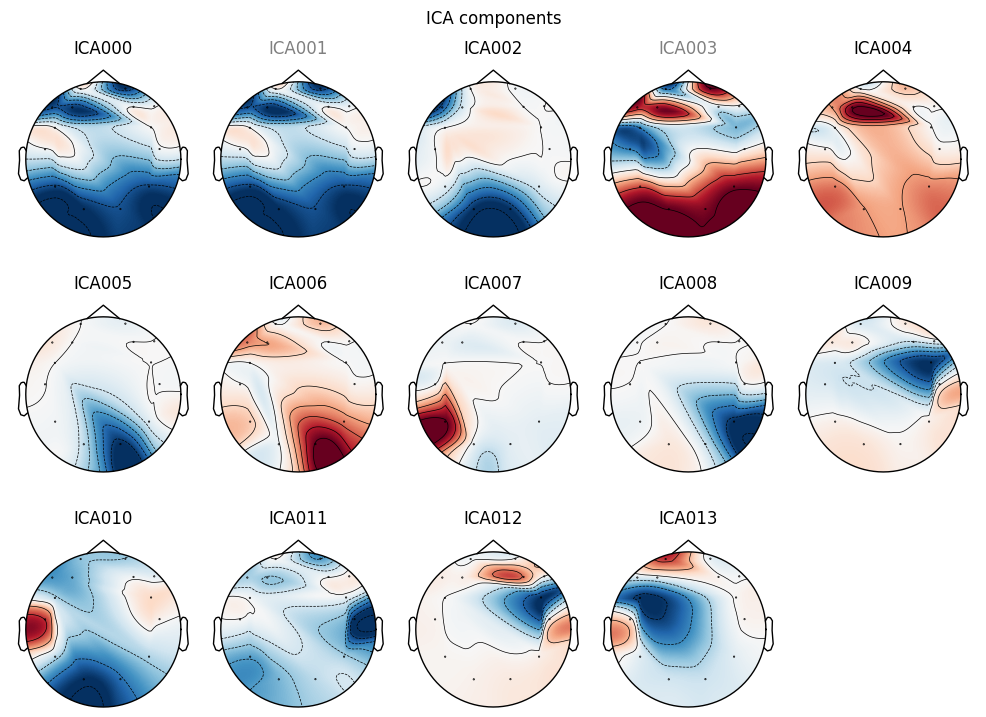

Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.


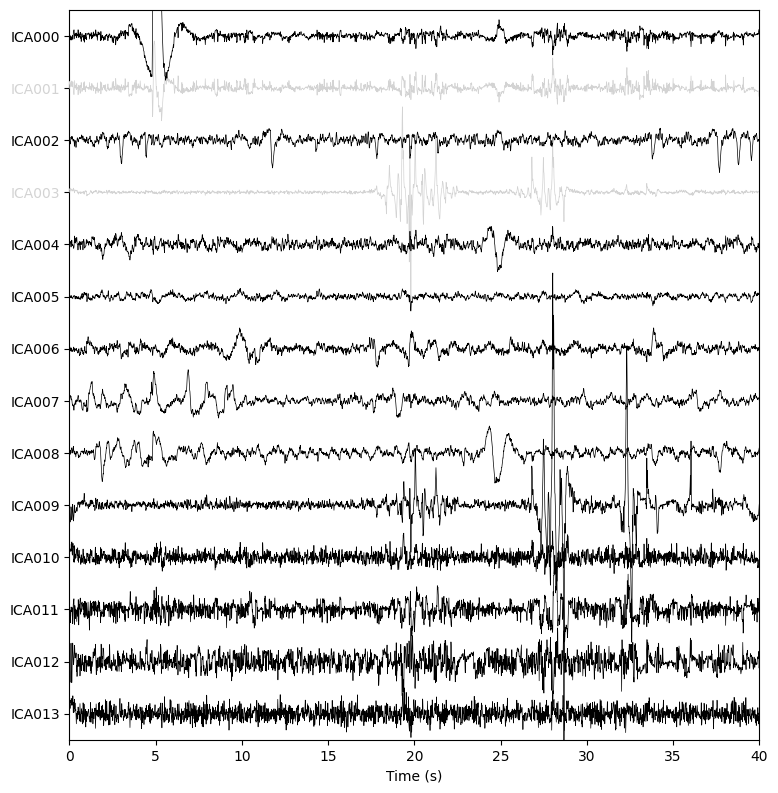

Vẽ các thành phần ICA cho file thứ 2


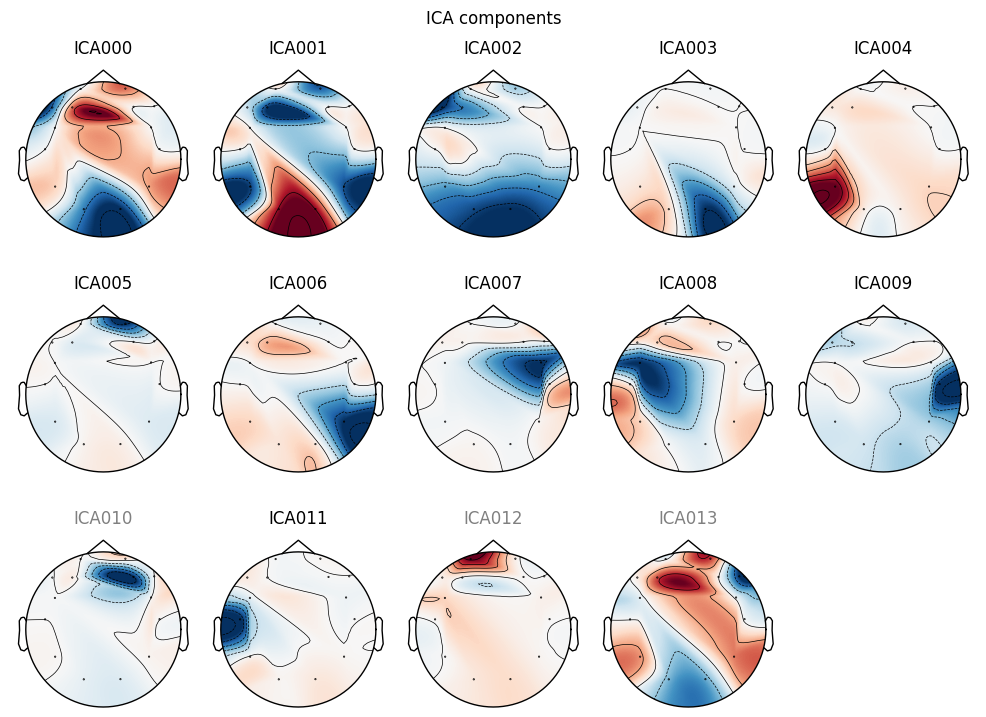

Creating RawArray with float64 data, n_channels=14, n_times=366020
    Range : 0 ... 366019 =      0.000 ...  2859.523 secs
Ready.


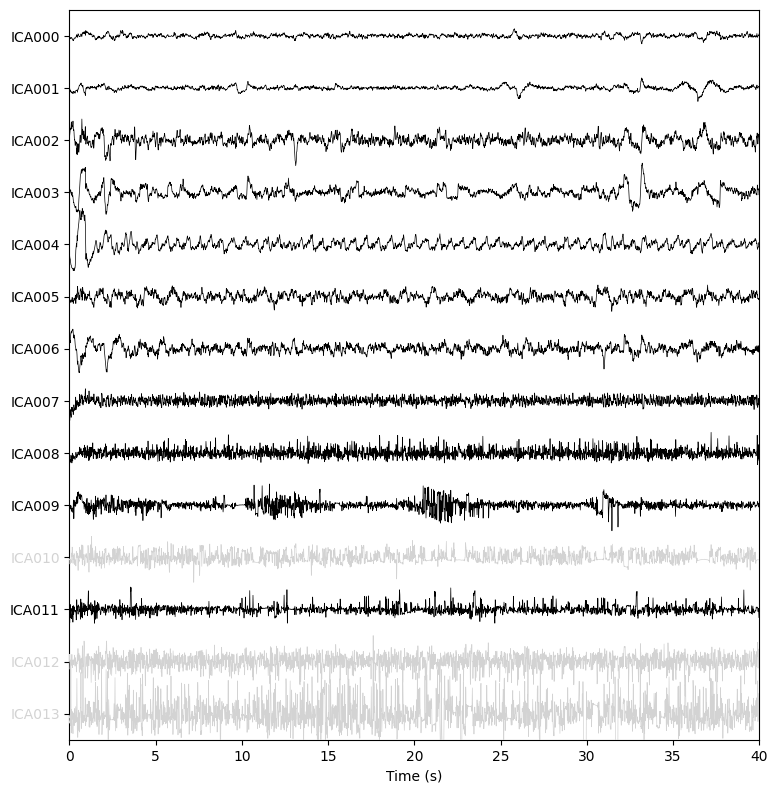

In [438]:
plot_ica_components(ica_full_data, raw_full_data)

Vẽ các thành phần ICA cho file thứ 1


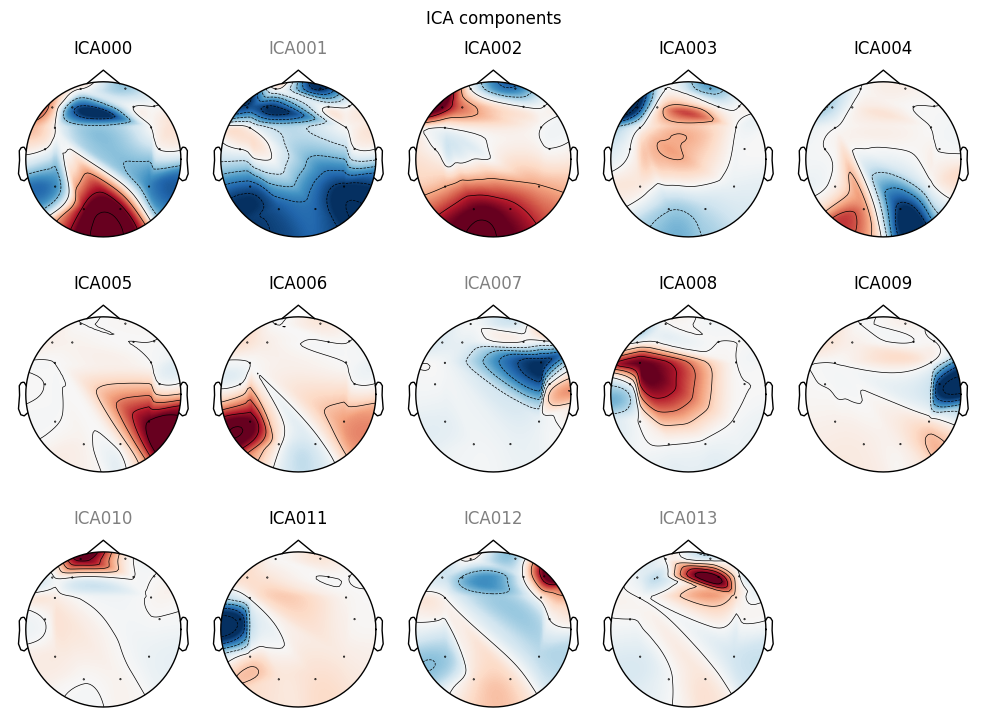

Creating RawArray with float64 data, n_channels=14, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.


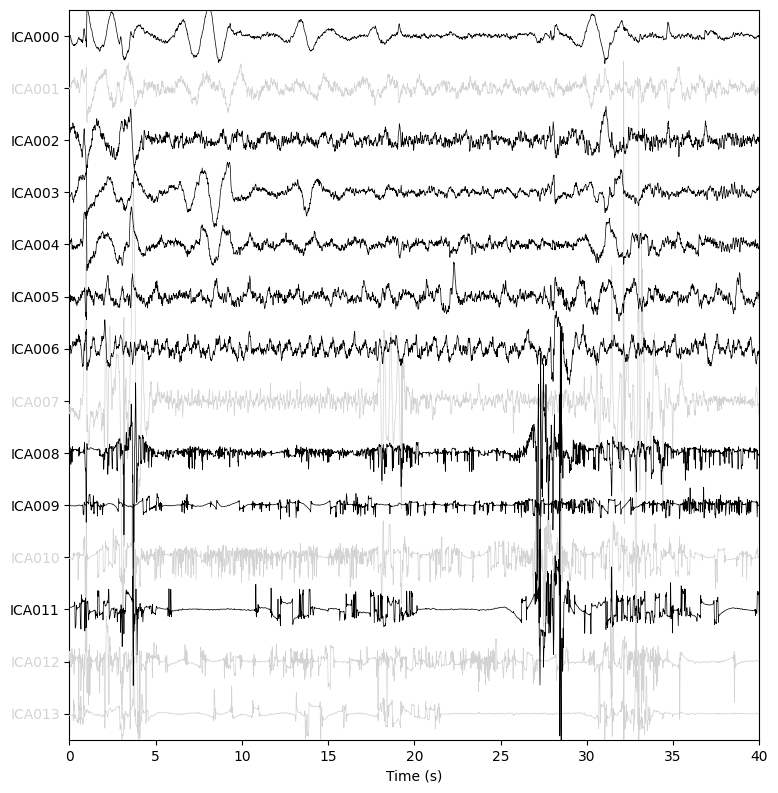

Vẽ các thành phần ICA cho file thứ 2


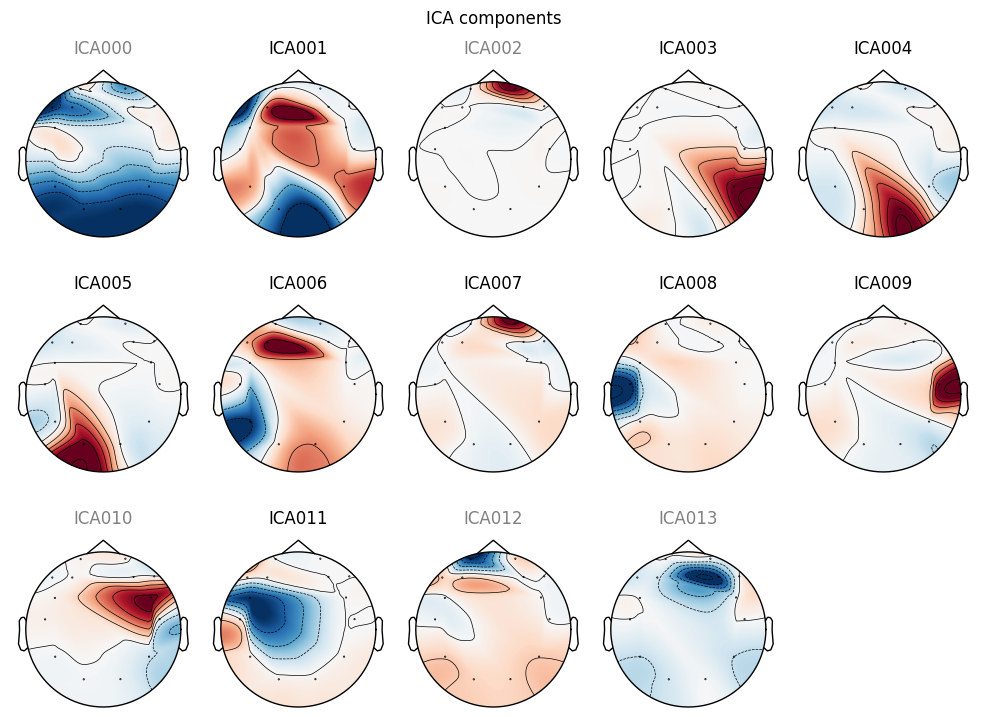

Creating RawArray with float64 data, n_channels=14, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.


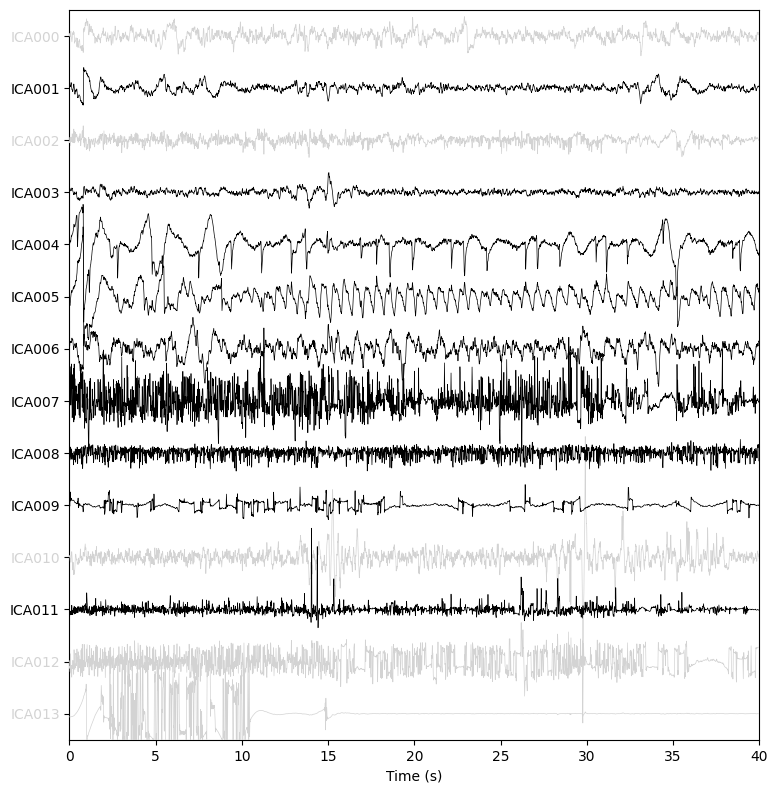

In [439]:
plot_ica_components(ica_reduce_data, raw_reduce_data)

In [469]:
# Lưu dữ liệu vào một dictionary với keys là 'file_1', 'file_2', ...
full_data_ICA = {}
reduce_data_ICA = {}

for idx, raw in enumerate(excluded_raw_full):
    file_key = f"file_{idx + 1}"  # Key cho từng file (file_1, file_2, ...)
    full_data_ICA[file_key] = raw.get_data()  # Lưu dữ liệu của file vào dictionary

for idx, raw in enumerate(excluded_raw_reduce):
    file_key = f"file_{idx + 1}"  # Key cho từng file (file_1, file_2, ...)
    reduce_data_ICA[file_key] = raw.get_data()  # Lưu dữ liệu của file vào dictionary

In [470]:
# In thử data của 1 file 
full_data_ICA['file_1'].shape

(14, 308868)

# Features Extract

In [501]:
from scipy.signal import stft
from numpy import blackman
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [530]:
# Parameters
fs = 128  # Sampling frequency (Hz)
window_size = 15  # Window size in seconds
overlap_size = 5  # Overlap size in seconds
window_length = window_size * fs
overlap_length = overlap_size * fs
step_size = window_length - overlap_length
frequency_range = (0, 30)  # Frequency range (Hz)
selected_channels = [0, 13, 2, 11, 6, 7, 8, 5]  # Selected channel indices

# Assign labels based on segment start time
def assign_label(segment_start_time):
    if segment_start_time < 600:  # 0–10 minutes
        return "Focused"
    elif segment_start_time < 1200:  # 10–20 minutes
        return "Unfocused"
    else:  # >20 minutes
        return "Drowsy"

# Ensure overlap_length is valid
if overlap_length >= window_length:
    raise ValueError("Overlap length must be less than window length.")

# Feature extraction function
def extract_features_with_labels(data, selected_channels, fs, window_length, overlap_length, frequency_range):
    results = []
    step_size = window_length - overlap_length

    for channel_idx in selected_channels:
        if channel_idx >= data.shape[0]:
            continue
        signal = data[channel_idx, :]

        num_segments = (len(signal) - window_length) // step_size + 1
        for segment_idx in range(num_segments):
            start_idx = segment_idx * step_size
            end_idx = start_idx + window_length
            segment = signal[start_idx:end_idx]

            if len(segment) < window_length:
                continue

            segment_start_time = start_idx / fs
            label = assign_label(segment_start_time)

            # Compute spectrogram (STFT)
            freqs, _, Zxx = stft(segment, fs, nperseg=window_length, noverlap=overlap_length)
            psd = np.abs(Zxx)**2

            freq_indices = (freqs >= frequency_range[0]) & (freqs <= frequency_range[1])
            psd = psd[freq_indices]
            freqs = freqs[freq_indices]

            selected_frequencies = np.arange(frequency_range[0], frequency_range[1] + 0.5, 0.5)
            features = {}
            for freq in selected_frequencies:
                idx = (np.abs(freqs - freq)).argmin()
                features[f"Freq_{freq:.1f}Hz"] = 10 * np.log10(psd[idx].mean())

            features.update({
                "Channel": channel_idx,
                "Segment": segment_idx,
                "Label": label,
            })
            results.append(features)

    return pd.DataFrame(results)

# Process data
results = []
for file_key, data in reduce_data_ICA.items():
    features_df = extract_features_with_labels(
        data, selected_channels, fs, window_length, overlap_length, frequency_range
    )
    features_df["File"] = file_key
    results.append(features_df)

final_features_df = pd.concat(results, ignore_index=True)
final_features_df.to_csv("eeg_features.csv", index=False)
print("Features extracted and saved to 'eeg_features.csv'")


Features extracted and saved to 'eeg_features.csv'


Epoch 1/30, Loss: 0.9350, Accuracy: 58.88%
Epoch 2/30, Loss: 0.9131, Accuracy: 59.68%
Epoch 3/30, Loss: 0.9087, Accuracy: 59.72%
Epoch 4/30, Loss: 0.9034, Accuracy: 59.89%
Epoch 5/30, Loss: 0.9005, Accuracy: 60.00%
Epoch 6/30, Loss: 0.8993, Accuracy: 59.86%
Epoch 7/30, Loss: 0.8977, Accuracy: 59.94%
Epoch 8/30, Loss: 0.8953, Accuracy: 59.92%
Epoch 9/30, Loss: 0.8930, Accuracy: 60.20%
Epoch 10/30, Loss: 0.8906, Accuracy: 60.05%
Epoch 11/30, Loss: 0.8892, Accuracy: 60.21%
Epoch 12/30, Loss: 0.8903, Accuracy: 60.23%
Epoch 13/30, Loss: 0.8875, Accuracy: 60.34%
Epoch 14/30, Loss: 0.8849, Accuracy: 60.21%
Epoch 15/30, Loss: 0.8863, Accuracy: 60.24%
Epoch 16/30, Loss: 0.8859, Accuracy: 60.25%
Epoch 17/30, Loss: 0.8829, Accuracy: 60.32%
Epoch 18/30, Loss: 0.8843, Accuracy: 60.43%
Epoch 19/30, Loss: 0.8821, Accuracy: 60.49%
Epoch 20/30, Loss: 0.8809, Accuracy: 60.57%
Epoch 21/30, Loss: 0.8818, Accuracy: 60.53%
Epoch 22/30, Loss: 0.8802, Accuracy: 60.30%
Epoch 23/30, Loss: 0.8791, Accuracy: 60.5

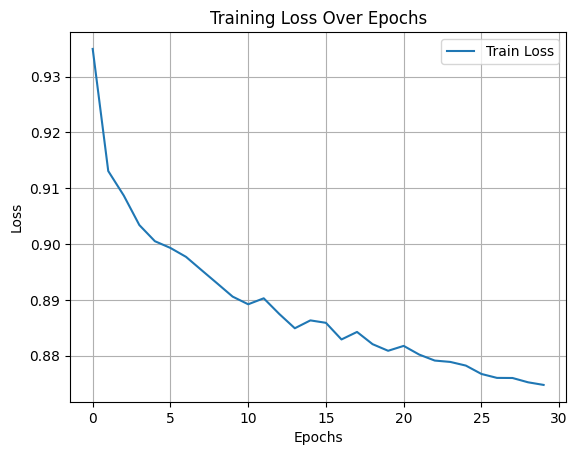

In [531]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load extracted features
features_df = pd.read_csv("eeg_features.csv")

# Drop unnecessary columns
X = features_df.drop(columns=["File", "Segment", "Channel", "Label"])
labels = features_df["Label"]  # Replace with your label column if necessary

# Encode labels (example: replace this logic with your label definition)
label_mapping = {"Focused": 0, "Unfocused": 1, "Drowsy": 2}
y = labels.map(label_mapping)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class EEGModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(EEGModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)  # No activation for logits
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
output_dim = len(np.unique(y))  # Number of classes
model = EEGModel(input_dim, output_dim).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=30):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()
    
    train_losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        
        train_losses.append(epoch_loss / len(train_loader))
        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")
    
    return train_losses

# Evaluate the model
def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Training
epochs = 30
train_losses = train_model(model, train_loader, criterion, optimizer, epochs)

# Evaluation
test_accuracy = evaluate_model(model, test_loader)

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# Preprocessing for model

In [502]:
df = pd.read_csv("eeg_features.csv")

# 2. Xử lý dữ liệu
# Loại bỏ cột không cần thiết
features = df.drop(columns=["File", "Segment", "Channel", "Label"])
labels = df["Label"]

# Mã hóa nhãn (Focused = 0, Unfocused = 1, Drowsy = 2)
label_mapping = {"Focused": 0, "Unfocused": 1, "Drowsy": 2}
labels_encoded = labels.map(label_mapping)

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi dữ liệu sang tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(-1)  # Thêm chiều cuối
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(-1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Tạo DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [504]:
print("Input shape:", X_train_tensor.shape)


Input shape: torch.Size([29932, 4, 1])


Using device: cpu
Epoch 1/30, Loss: 0.9378, Accuracy: 59.00%
Epoch 2/30, Loss: 0.9259, Accuracy: 59.72%
Epoch 3/30, Loss: 0.9232, Accuracy: 59.65%
Epoch 4/30, Loss: 0.9222, Accuracy: 59.70%
Epoch 5/30, Loss: 0.9190, Accuracy: 59.68%
Epoch 6/30, Loss: 0.9170, Accuracy: 59.98%
Epoch 7/30, Loss: 0.9173, Accuracy: 59.79%
Epoch 8/30, Loss: 0.9154, Accuracy: 59.81%
Epoch 9/30, Loss: 0.9138, Accuracy: 59.86%
Epoch 10/30, Loss: 0.9148, Accuracy: 59.93%
Epoch 11/30, Loss: 0.9115, Accuracy: 60.20%
Epoch 12/30, Loss: 0.9123, Accuracy: 59.91%
Epoch 13/30, Loss: 0.9118, Accuracy: 59.86%
Epoch 14/30, Loss: 0.9108, Accuracy: 60.01%
Epoch 15/30, Loss: 0.9105, Accuracy: 59.99%
Epoch 16/30, Loss: 0.9101, Accuracy: 60.14%
Epoch 17/30, Loss: 0.9099, Accuracy: 60.02%
Epoch 18/30, Loss: 0.9092, Accuracy: 60.10%
Epoch 19/30, Loss: 0.9090, Accuracy: 60.15%
Epoch 20/30, Loss: 0.9073, Accuracy: 60.26%
Epoch 21/30, Loss: 0.9090, Accuracy: 59.99%
Epoch 22/30, Loss: 0.9072, Accuracy: 59.88%
Epoch 23/30, Loss: 0.90

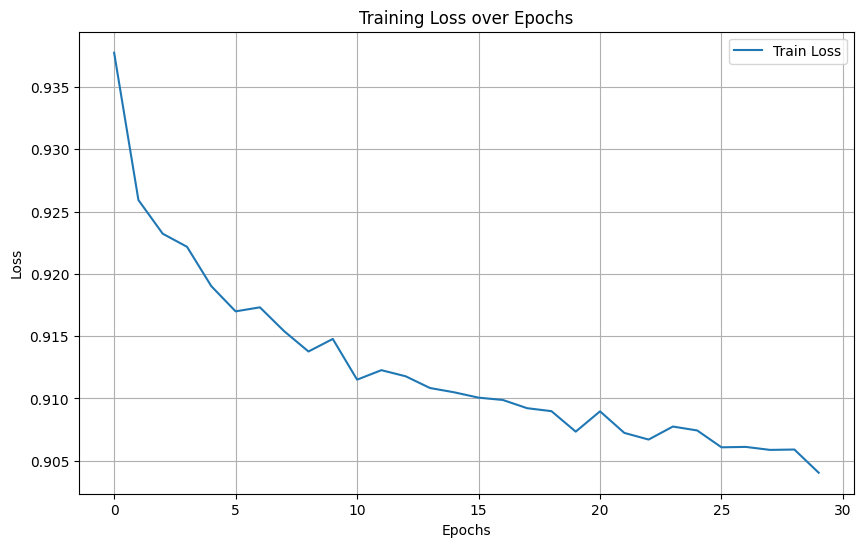

In [507]:
# Kiểm tra GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class EEG_CNN(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(EEG_CNN, self).__init__()
        self.flatten_input = nn.Flatten()  # Flatten the input to remove unnecessary dimensions
        self.fc1 = nn.Linear(input_shape[0], 64)  # Match the first dimension of the input
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.flatten_input(x)  # Flatten to shape (batch_size, features)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)  # Final layer with logits
        return x

# Khởi tạo mô hình
input_shape = (X_train_tensor.shape[1], 1)
num_classes = len(torch.unique(y_train_tensor))  # Sử dụng tensor y_train_tensor
model = EEG_CNN(input_shape, num_classes).to(device)

# Định nghĩa hàm loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hàm huấn luyện
def train_model(model, train_loader, criterion, optimizer, epochs=30):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
        accuracy = 100 * correct / total
        train_loss.append(epoch_loss / len(train_loader))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss[-1]:.4f}, Accuracy: {accuracy:.2f}%")
    return train_loss

# Hàm đánh giá
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Huấn luyện mô hình
epochs = 30
train_loss = train_model(model, train_loader, criterion, optimizer, epochs)

# Đánh giá mô hình
test_accuracy = evaluate_model(model, test_loader)

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
